In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow
import numpy as np # linear algebra
import seaborn as sns # visualization
import matplotlib.pyplot as pl
from sklearn.preprocessing import LabelEncoder

2025-01-17 17:30:57.936774: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-17 17:30:57.938060: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-17 17:30:57.945987: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-17 17:30:57.974880: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737131458.015047   22718 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737131458.02

In [2]:
df = pd.read_csv("../content/Student_Data.csv")
df

,Age,BMI,Gender,DBP,Cholesterol Level,Smoking Habit,Alcohol Intake,Physical Activity,FBS,Cardiovascular Disease
0,62,36,1,87,3,0,1,1,77,0
1,65,15,2,97,2,1,1,1,89,0
2,82,25,2,95,3,0,1,1,108,0
3,85,27,1,100,2,1,1,0,71,1
4,85,18,2,86,3,0,1,1,113,0
...,...,...,...,...,...,...,...,...,...,...
95,66,24,2,60,3,1,0,0,115,0
96,21,33,1,70,1,1,1,0,92,0
97,60,16,1,89,2,1,0,0,110,0
98,95,31,2,74,2,1,0,1,82,1


In [3]:
df.describe()

,Age,BMI,Gender,DBP,Cholesterol Level,Smoking Habit,Alcohol Intake,Physical Activity,FBS,Cardiovascular Disease
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,59.310000,26.670000,1.540000,89.780000,2.000000,0.440000,0.530000,0.520000,97.510000,0.370000
std,24.113241,7.020971,0.500908,16.379699,0.816497,0.498888,0.501614,0.502117,16.812991,0.485237
min,18.000000,15.000000,1.000000,60.000000,1.000000,0.000000,0.000000,0.000000,70.000000,0.000000
25%,38.750000,20.000000,1.000000,77.500000,1.000000,0.000000,0.000000,0.000000,83.000000,0.000000
50%,59.500000,27.000000,2.000000,91.000000,2.000000,0.000000,1.000000,1.000000,97.000000,0.000000
75%,82.000000,32.000000,2.000000,102.000000,3.000000,1.000000,1.000000,1.000000,111.000000,1.000000
max,99.000000,39.000000,2.000000,119.000000,3.000000,1.000000,1.000000,1.000000,125.000000,1.000000


In [4]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


In [6]:
classifier = Sequential()
classifier.add(Dense(units = 4, activation = "relu", kernel_initializer = "glorot_uniform", input_dim = 9))
classifier.add(Dense(units = 3, activation= "relu"))
classifier.add(Dense(units= 1, activation= "sigmoid"))

/home/leandrofdez/Escritorio/LEANDRO/4/AI/PRACTICE/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1737131462.412833   22718 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


# Task

Understanding of artificial neural networks (ANNs) and their ability to implement them in Python:
You have been given a dataset containing customer information, such as age, income, and credit score.

The goal of this task is to train an artificial neural network (ANN) to predict whether a customer is likely to default on their loan or not.

The dataset is provided in the form of a CSV file, and it is divided into two parts: a training set and a test
set. You are required to use the training set to train an ANN, and then evaluate the performance of the
network on the test set.

You are required to use Python for this task and you should use Keras or Tensorflow library for building
the ANN.

You should also report the following:

1. A brief summary of the data, including the number of samples, number of features, and number of classes.
1. A description of the architecture of the network, including the number of layers, the number of
neurons in each layer, and the type of activation functions used.
1. A plot of the training and validation loss and accuracy over the epochs.
1. The final accuracy and confusion matrix of the test set.
1. You should also include all of your code and comments, as well as any additional analysis or
discussion that you think is necessary to explain your approach and the results fully.
Please make sure to handle the categorical variables and missing values.

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [8]:
# Load the dataset
data = pd.read_csv('../content/Student_Data.csv')
data

,Age,BMI,Gender,DBP,Cholesterol Level,Smoking Habit,Alcohol Intake,Physical Activity,FBS,Cardiovascular Disease
0,62,36,1,87,3,0,1,1,77,0
1,65,15,2,97,2,1,1,1,89,0
2,82,25,2,95,3,0,1,1,108,0
3,85,27,1,100,2,1,1,0,71,1
4,85,18,2,86,3,0,1,1,113,0
...,...,...,...,...,...,...,...,...,...,...
95,66,24,2,60,3,1,0,0,115,0
96,21,33,1,70,1,1,1,0,92,0
97,60,16,1,89,2,1,0,0,110,0
98,95,31,2,74,2,1,0,1,82,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     100 non-null    int64
 1   BMI                     100 non-null    int64
 2   Gender                  100 non-null    int64
 3   DBP                     100 non-null    int64
 4   Cholesterol Level       100 non-null    int64
 5   Smoking Habit           100 non-null    int64
 6   Alcohol Intake          100 non-null    int64
 7   Physical Activity       100 non-null    int64
 8   FBS                     100 non-null    int64
 9   Cardiovascular Disease  100 non-null    int64
dtypes: int64(10)
memory usage: 7.9 KB


In [10]:
# Handle missing values
data = data.fillna(data.mean())

In [11]:
# Encode categorical values
# There are no categorical values

In [12]:
# Split the data into training and test sets
x=data.drop(['Cardiovascular Disease'], axis=1)
y=data['Cardiovascular Disease']

train_data, test_data, train_labels, test_labels = train_test_split(x,y,test_size=0.2)

In [13]:
# Define the model
model = Sequential()
model.add(Dense(64, input_dim=train_data.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/home/leandrofdez/Escritorio/LEANDRO/4/AI/PRACTICE/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Train the model
history = model.fit(train_data, train_labels, epochs=100, batch_size=32, validation_data=(test_data,
test_labels), callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step - accuracy: 0.6469 - loss: 4.3996 - val_accuracy: 0.4000 - val_loss: 2.3856
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5477 - loss: 1.7382 - val_accuracy: 0.3000 - val_loss: 2.3804
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4422 - loss: 2.1671 - val_accuracy: 0.4500 - val_loss: 1.9356
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5859 - loss: 1.0923 - val_accuracy: 0.5500 - val_loss: 2.7278
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6570 - loss: 1.4883 - val_accuracy: 0.5500 - val_loss: 1.8995
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6461 - loss: 0.7720 - val_accuracy: 0.3500 - val_loss: 1.3163
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5008 - loss: 1.1651 - val_accuracy: 0.4000 - val_loss: 1.1751
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5391 - loss: 0.8880 - val_accuracy: 0.5000 - val_loss

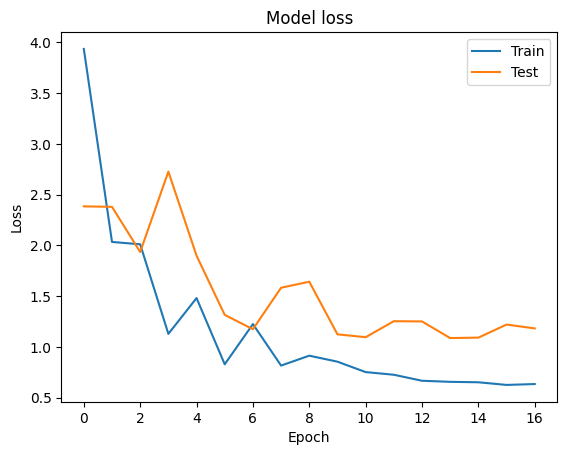

In [15]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])

In [16]:
pred=model.predict(test_data)
pred = (pred > 0.5)
print("Accuracy Score: ", accuracy_score(test_labels,pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Accuracy Score:  0.45


In [17]:
# Confusion Matrix
cm=confusion_matrix(test_labels,pred)
cm

array([[8, 3],
       [8, 1]])

# Task